In [ ]:
import pandas as pd
import numpy as num

url = 'https://raw.githubusercontent.com/N0CTIS99/thesisdataset/main/credit_risk.csv'
dataset = pd.read_csv(url)
dataset.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
dataset=dataset.drop(['Loan ID'],axis = 1)
dataset=dataset.drop(['Customer ID'],axis = 1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100000 non-null  object 
 1   Current Loan Amount           100000 non-null  float64
 2   Term                          100000 non-null  object 
 3   Credit Score                  80846 non-null   float64
 4   Annual Income                 80846 non-null   float64
 5   Years in current job          95778 non-null   object 
 6   Home Ownership                100000 non-null  object 
 7   Purpose                       100000 non-null  object 
 8   Monthly Debt                  100000 non-null  float64
 9   Years of Credit History       100000 non-null  float64
 10  Months since last delinquent  46859 non-null   float64
 11  Number of Open Accounts       100000 non-null  float64
 12  Number of Credit Problems     100000 non-nul

In [ ]:
#feature encoding starts
dataset['Loan Status'].unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

In [ ]:
dataset['Loan Status'] = dataset['Loan Status'].map({'Fully Paid':1,'Charged Off':0})

In [ ]:
dataset['Term'].unique()

array(['Short Term', 'Long Term', nan], dtype=object)

In [ ]:
dataset['Term'] = dataset['Term'].map({'Short Term':1,'Long Term':0})

In [ ]:
dataset['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage', nan],
      dtype=object)

In [ ]:
dataset['Home Ownership'] = dataset['Home Ownership'].map({'Home Mortgage':0,'Own Home':1,'Rent':2,'HaveMortgage':3})

In [ ]:
dataset['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy', nan],
      dtype=object)

In [ ]:
dataset['Purpose'] = dataset['Purpose'].map({'Home Improvements':0,'Debt Consolidation':1,'Buy House':2,
                                             'other':3,'Business Loan':4,'Buy a Car':5,'major_purchase':6,'Take a Trip':7,
                                            'Other':3,'small_business':8,'wedding':9,'vacation':10,'Educational Expenses':11,
                                            'moving':12,'renewable_energy':13})


In [ ]:
dataset['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

In [ ]:
dataset['Years in current job'] = dataset['Years in current job'].map({'< 1 year':0,'1 year':1,'2 years':2,
                                             '3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,
                                            '8 years':8,'9 years':9,'10+ years':10})

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100000 non-null  float64
 1   Current Loan Amount           100000 non-null  float64
 2   Term                          100000 non-null  float64
 3   Credit Score                  80846 non-null   float64
 4   Annual Income                 80846 non-null   float64
 5   Years in current job          95778 non-null   float64
 6   Home Ownership                100000 non-null  float64
 7   Purpose                       98873 non-null   float64
 8   Monthly Debt                  100000 non-null  float64
 9   Years of Credit History       100000 non-null  float64
 10  Months since last delinquent  46859 non-null   float64
 11  Number of Open Accounts       100000 non-null  float64
 12  Number of Credit Problems     100000 non-nul

In [ ]:
dataset.isnull().sum()

Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                          1641
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [ ]:
#imputing null Values
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=num.nan, strategy='mean')
impute.fit(dataset[['Current Loan Amount']])
dataset['Current Loan Amount']=impute.transform(dataset[['Current Loan Amount']])

In [ ]:
impute.fit(dataset[['Credit Score']])
dataset['Credit Score']=impute.transform(dataset[['Credit Score']])
impute.fit(dataset[['Annual Income']])
dataset['Annual Income']=impute.transform(dataset[['Annual Income']])
impute.fit(dataset[['Years in current job']])
dataset['Years in current job']=impute.transform(dataset[['Years in current job']])

In [ ]:
impute.fit(dataset[['Term']])
dataset['Term']=impute.transform(dataset[['Term']])
impute.fit(dataset[['Loan Status']])
dataset['Loan Status']=impute.transform(dataset[['Loan Status']])

In [ ]:
impute.fit(dataset[['Home Ownership']])
dataset['Home Ownership']=impute.transform(dataset[['Home Ownership']])

In [ ]:
impute.fit(dataset[['Purpose']])
dataset['Purpose']=impute.transform(dataset[['Purpose']])

In [ ]:
impute.fit(dataset[['Monthly Debt']])
dataset['Monthly Debt']=impute.transform(dataset[['Monthly Debt']])

In [ ]:
impute.fit(dataset[['Years of Credit History']])
dataset['Years of Credit History']=impute.transform(dataset[['Years of Credit History']])

In [ ]:
impute.fit(dataset[['Number of Open Accounts']])
dataset['Number of Open Accounts']=impute.transform(dataset[['Number of Open Accounts']])

In [ ]:
impute.fit(dataset[['Number of Credit Problems']])
dataset['Number of Credit Problems']=impute.transform(dataset[['Number of Credit Problems']])

In [ ]:
impute.fit(dataset[['Current Credit Balance']])
dataset['Current Credit Balance']=impute.transform(dataset[['Current Credit Balance']])

In [ ]:
impute.fit(dataset[['Maximum Open Credit']])
dataset['Maximum Open Credit']=impute.transform(dataset[['Maximum Open Credit']])

In [ ]:
impute.fit(dataset[['Bankruptcies']])
dataset['Bankruptcies']=impute.transform(dataset[['Bankruptcies']])

In [ ]:
impute.fit(dataset[['Tax Liens']])
dataset['Tax Liens']=impute.transform(dataset[['Tax Liens']])

In [ ]:
dataset.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                       0
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53655
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

In [ ]:
#Dropping Months since last delinquent Because it has more than 50% null Values
dataset=dataset.drop(['Months since last delinquent'],axis = 1)
#dataset= dataset.astype(int)
dataset.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1.0,445412.0,1.0,709.000000,1.167493e+06,8.0,0.0,0.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1.0,262328.0,1.0,1076.456089,1.378277e+06,10.0,0.0,1.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1.0,99999999.0,1.0,741.000000,2.231892e+06,8.0,1.0,1.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1.0,347666.0,0.0,721.000000,8.069490e+05,3.0,1.0,1.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1.0,176220.0,1.0,1076.456089,1.378277e+06,5.0,2.0,1.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
#Scaling data except the encoded features
from sklearn.preprocessing import MinMaxScaler
myscale = MinMaxScaler()
#myscale.fit(dataset)
#scaledset = myscale.transform(dataset)
dataset[['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']] =myscale.fit_transform(dataset[['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']])

In [ ]:
#train test spliting
from sklearn.model_selection import train_test_split
X=dataset.drop(['Loan Status'], axis = 1)
y=dataset['Loan Status'].astype(int)
#X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [ ]:
#Checking Accuracy For  Logistic Regression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
#print(predictions)
acc=accuracy_score(y_test, predictions)
print(acc)
print(classification_report(y_test, predictions))

0.816644281947968
              precision    recall  f1-score   support

           0       1.00      0.20      0.33      4604
           1       0.81      1.00      0.89     15499

    accuracy                           0.82     20103
   macro avg       0.90      0.60      0.61     20103
weighted avg       0.85      0.82      0.77     20103



In [ ]:
#Checking Accuracy For  Random Forest
from sklearn.ensemble import RandomForestClassifier
randomf = RandomForestClassifier(n_estimators=50)
randomf.fit(X_train, y_train)
randomf_predictions =randomf.predict(X_test)
rf_acc=accuracy_score(y_test, randomf_predictions)
print(rf_acc)
print(classification_report(y_test, randomf_predictions))

0.8224145649903
              precision    recall  f1-score   support

           0       0.86      0.27      0.41      4604
           1       0.82      0.99      0.90     15499

    accuracy                           0.82     20103
   macro avg       0.84      0.63      0.65     20103
weighted avg       0.83      0.82      0.78     20103



In [ ]:
#Checking Accuracy For Linear Regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
lr= LinearRegression()
lr.fit(X_train, y_train)
lr_predictions =lr.predict(X_test)
lr_acc=accuracy_score(y_test, lr_predictions.round())
print(lr_acc)
print(classification_report(y_test, lr_predictions.round()))

0.816644281947968
              precision    recall  f1-score   support

           0       1.00      0.20      0.33      4604
           1       0.81      1.00      0.89     15499

    accuracy                           0.82     20103
   macro avg       0.90      0.60      0.61     20103
weighted avg       0.85      0.82      0.77     20103



In [ ]:
#Checking Accuracy For KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
knn_predictions =knn.predict(X_test)
knn_acc=accuracy_score(y_test, knn_predictions)
print(knn_acc)
print(classification_report(y_test, knn_predictions))

0.8152514550067154
              precision    recall  f1-score   support

           0       0.87      0.23      0.36      4604
           1       0.81      0.99      0.89     15499

    accuracy                           0.82     20103
   macro avg       0.84      0.61      0.63     20103
weighted avg       0.82      0.82      0.77     20103



In [ ]:
#Code For ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
#predicting
r_probs = [0 for _ in range(len(y_test))]
rf_probs = randomf.predict_proba(X_test)
#lr_probs = lr.predict_proba(X_test)
logr_probs = model.predict_proba(X_test)
knn_probs=knn.predict_proba(X_test)
#choosing positive values
rf_probs = rf_probs[:, 1]
#lr_probs = lr_probs[:, 1]
logr_probs = logr_probs[:, 1]
knn_probs = knn_probs[:, 1]

In [ ]:
#calculative curve
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
logr_fpr, logr_tpr, _ = roc_curve(y_test, logr_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

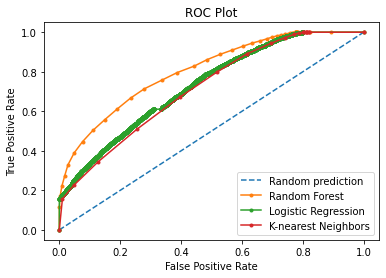

In [ ]:
#plotting
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction' )
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest' )
plt.plot(logr_fpr, logr_tpr, marker='.', label='Logistic Regression ')
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-nearest Neighbors')

plt.title('ROC Plot')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend() # 

plt.show()

In [ ]:
#accuracy for GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_predict = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predict)
print(gb_accuracy)
print(classification_report(y_test, gb_predict))

0.821867382977665
              precision    recall  f1-score   support

           0       0.99      0.23      0.37      4604
           1       0.81      1.00      0.90     15499

    accuracy                           0.82     20103
   macro avg       0.90      0.61      0.63     20103
weighted avg       0.85      0.82      0.78     20103



In [ ]:
#accuracy for XGBoost
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 12, n_estimators = 300)
xgb_classifier.fit(X_train, y_train)
xgb_predict = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predict)
print(xgb_accuracy)
print(classification_report(y_test, xgb_predict))

0.8237576481122221
              precision    recall  f1-score   support

           0       0.87      0.27      0.41      4604
           1       0.82      0.99      0.90     15499

    accuracy                           0.82     20103
   macro avg       0.85      0.63      0.65     20103
weighted avg       0.83      0.82      0.79     20103



In [ ]:
#accuracy for XGBoostRegressor
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 12, n_estimators = 300)
xgb_regressor.fit(X_train, y_train)
xgb_regressor_predict = xgb_regressor.predict(X_test)
xgb_regressor_accuracy = accuracy_score(y_test, xgb_regressor_predict.round())
print(xgb_regressor_accuracy)
print(classification_report(y_test, xgb_regressor_predict.round()))

[14:40:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.823409441376909
              precision    recall  f1-score   support

           0       0.89      0.26      0.40      4604
           1       0.82      0.99      0.90     15499

    accuracy                           0.82     20103
   macro avg       0.85      0.63      0.65     20103
weighted avg       0.84      0.82      0.78     20103



In [ ]:
#accuracy for MLPRegressor(ANN)
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(activation='relu', learning_rate = 'adaptive', alpha=1e-5, hidden_layer_sizes= tuple(100 for _ in range(10)))
ann.fit(X_train, y_train)
ann_predict = ann.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_predict.round())
print(ann_accuracy)

0.8215191762423519


In [ ]:
#accuracy for ADABoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_predict = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predict)
print(ada_accuracy)
print(classification_report(y_test, ada_predict))

0.8216684077003432
              precision    recall  f1-score   support

           0       0.98      0.23      0.37      4604
           1       0.81      1.00      0.90     15499

    accuracy                           0.82     20103
   macro avg       0.90      0.61      0.63     20103
weighted avg       0.85      0.82      0.77     20103



In [ ]:
#accuracy for ADABoostClassifier
from sklearn.ensemble import AdaBoostRegressor
ada_regressor = AdaBoostRegressor()
ada_regressor.fit(X_train, y_train)
ada_regressor_predict = ada_regressor.predict(X_test)
ada_regressor_accuracy = accuracy_score(y_test, ada_regressor_predict.round())
print(ada_regressor_accuracy)
print(classification_report(y_test, ada_regressor_predict.round()))

0.8215191762423519
              precision    recall  f1-score   support

           0       1.00      0.22      0.36      4604
           1       0.81      1.00      0.90     15499

    accuracy                           0.82     20103
   macro avg       0.91      0.61      0.63     20103
weighted avg       0.86      0.82      0.77     20103

